## PART I. Data Profiling and Preprocessing Decisions

This notebook focuses on the Data Understanding phase of the CRISP-DM framework.We adopt the CRISP-DM framework because it explicitly emphasizes data understanding and data preparation, which are the core objectives of this project.
listings.csv is selected as the primary dataset as it contains the essential listing-level attributes, while other files are excluded to avoid introducing temporal, textual, or geospatial complexities beyond the project scope.


In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("../data/listings.csv")
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,71609,https://www.airbnb.com/rooms/71609,20250928035118,2025-09-28,previous scrape,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,...,4.78,4.26,4.32,NaN,f,5,0,5,0,0.11
1,71896,https://www.airbnb.com/rooms/71896,20250928035118,2025-09-28,city scrape,B&B Room 1 near Airport & EXPO,NaN,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,...,4.43,4.17,4.04,NaN,f,5,0,5,0,0.14
2,71903,https://www.airbnb.com/rooms/71903,20250928035118,2025-09-28,city scrape,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,...,4.64,4.50,4.36,NaN,f,5,0,5,0,0.26
3,275343,https://www.airbnb.com/rooms/275343,20250928035118,2025-09-28,previous scrape,10min walk to MRT & a Cozy Room with window! (1),**IMPORTANT NOTES: READ BEFORE YOU BOOK! <br ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,4.42,4.53,4.63,S0399,t,49,0,49,0,0.13
4,275344,https://www.airbnb.com/rooms/275344,20250928035118,2025-09-28,previous scrape,15 mins to Outram MRT Single Room (2),Lovely home for the special guest !,Bus stop <br />Food center <br />Supermarket,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,4.50,4.63,4.13,S0399,t,49,0,49,0,0.10


### a. Missing Values

In [13]:
missing_rate = df.isnull().mean().sort_values(ascending=False)
missing_rate.head(20)


calendar_updated               1.000000
neighbourhood                  0.534254
neighborhood_overview          0.534254
review_scores_value            0.500135
review_scores_location         0.500135
reviews_per_month              0.499865
review_scores_communication    0.499865
first_review                   0.499865
review_scores_rating           0.499865
review_scores_accuracy         0.499865
review_scores_cleanliness      0.499865
review_scores_checkin          0.499865
last_review                    0.499865
license                        0.435689
host_location                  0.410236
host_about                     0.372055
estimated_revenue_l365d        0.284322
price                          0.284322
host_acceptance_rate           0.247766
beds                           0.240455
dtype: float64

### Complete Missing Value Categorization

Based on feature-level missing rates, all variables are categorized according to
the thresholds defined above. At this stage, no features are removed; the
categorization is used solely to inform subsequent preprocessing decisions.

In [5]:
def missing_category(rate):
    if rate == 1.0:
        return "Fully missing"
    elif rate >= 0.45:
        return "Systematic missing"
    elif rate >= 0.20:
        return "Moderate missing"
    else:
        return "Low missing"

missing_category_series = missing_rate.apply(missing_category)
missing_category_series.value_counts()


Low missing           56
Systematic missing    12
Moderate missing      10
Fully missing          1
Name: count, dtype: int64

In [6]:
missing_summary = (
    missing_rate
    .to_frame(name="missing_rate")
    .assign(category=lambda x: x["missing_rate"].apply(missing_category))
    .sort_values("missing_rate", ascending=False)
)

missing_summary


,missing_rate,category
calendar_updated,1.000000,Fully missing
neighbourhood,0.534254,Systematic missing
neighborhood_overview,0.534254,Systematic missing
review_scores_value,0.500135,Systematic missing
review_scores_location,0.500135,Systematic missing
...,...,...
maximum_nights_avg_ntm,0.000000,Low missing
host_total_listings_count,0.000000,Low missing
scrape_id,0.000000,Low missing
last_scraped,0.000000,Low missing


In [7]:
import pandas as pd
pd.set_option("display.max_colwidth", None)


In [8]:
features_by_category = (
    missing_summary
    .groupby("category")
    .apply(lambda x: list(x.index))
)

features_by_category


C:\Users\Feng\AppData\Local\Temp\ipykernel_31644\2141248939.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: list(x.index))


category
Fully missing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [10]:
# double check counts
{k: len(v) for k, v in features_by_category.items()}



{'Fully missing': 1,
 'Low missing': 56,
 'Moderate missing': 10,
 'Systematic missing': 12}

#### Fully Missing (100%)

- `calendar_updated`

#### Systematic Missing (45–60%)

- `neighbourhood` (53.4%)
- `neighborhood_overview` (53.4%)
- `review_scores_value` (50.0%)
- `review_scores_location` (50.0%)
- `reviews_per_month` (50.0%)
- `review_scores_communication` (50.0%)
- `first_review` (50.0%)
- `review_scores_rating` (50.0%)
- `review_scores_accuracy` (50.0%)
- `review_scores_cleanliness` (50.0%)
- `review_scores_checkin` (50.0%)
- `last_review` (50.0%)

These features cluster tightly around 50% missingness, suggesting structured
missingness related to review availability or host-provided descriptions rather
than random data loss.

#### Moderate Missing (20–45%)

- `license` (43.6%)
- `host_location` (41.0%)
- `host_about` (37.2%)
- `estimated_revenue_1365d` (28.4%)
- `price` (28.4%)
- `host_acceptance_rate` (24.8%)
- `beds` (24.0%)

These features remain informative but incomplete and require careful handling
depending on their role (target vs feature) and data type.

#### Low Missing (<20%)

- All remaining features not listed above

### Missing Value Categorization by Feature

All features are categorized based on their observed missing rates. At this
stage, no features are removed; the categorization serves as a reference for
subsequent preprocessing decisions.

| Missingness Category | Missing Rate Range | Features |
|---------------------|--------------------|----------|
| Fully missing | 100% | `calendar_updated` |
| Systematic missing | 45–60% | `neighbourhood`, `neighborhood_overview`, `review_scores_value`, `review_scores_location`, `reviews_per_month`, `review_scores_communication`, `first_review`, `review_scores_rating`, `review_scores_accuracy`, `review_scores_cleanliness`, `review_scores_checkin`, `last_review` |
| Moderate missing | 20–45% | `license`, `host_location`, `host_about`, `estimated_revenue_1365d`, `price`, `host_acceptance_rate`, `beds`,`host_response_time`, `host_response_rate`, `bathrooms` |
| Low missing | <20% | All remaining features |


### b. Duplicated Values

In [17]:
# Check fully duplicated rows
df.duplicated().sum()

# Check duplicated listing IDs
df["id"].duplicated().sum()


np.int64(0)

No fully duplicated rows or duplicated listing identifiers are detected. This
indicates that the dataset does not suffer from record-level duplication, and no
deduplication is required.


### c. Data Type and Format Validation

In addition to missingness and duplication, data type consistency is examined
for key numerical variables.

The target variable `price` is expected to be numeric. Inspection of raw values
indicates that price is stored as a string containing non-numeric characters
(e.g., currency symbols and separators). This represents a format inconsistency
rather than a semantic error.

While this issue does not affect the identification of distributional patterns,
it must be addressed during data cleaning to enable numerical modeling. As such,
price parsing is deferred to the data cleaning stage.


### d. Distribution and Outlier Analysis

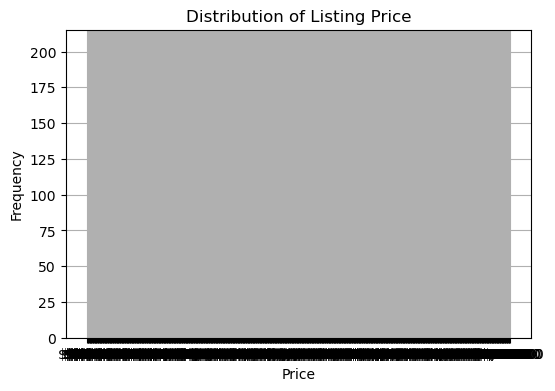

In [19]:
import matplotlib.pyplot as plt

# Basic distribution of price
plt.figure(figsize=(6, 4))
df["price"].hist(bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Listing Price")
plt.show()


##### Interpretation of Raw-Scale Distribution

The histogram plotted under the original price scale is visually dominated by a small number of extremely high-priced listings. As a result, the majority of observations are compressed into a narrow region near the lower end of the price axis, forming an almost uniform “grey block” that obscures any meaningful internal structure.

This visualization indicates that the raw scale is not suitable for directly interpreting the distribution of listing prices. Importantly, this does not imply an error in plotting, but rather reveals a scale mismatch caused by extreme values.

The presence of this effect suggests that price may exhibit a long-tailed distribution, where a small fraction of observations take very large values and disproportionately influence the scale. To determine whether these extreme values represent random noise or a systematic distributional pattern, alternative visualizations are required.

Accordingly, the following analyses re-examine the price distribution using zoomed-in and logarithmic scales to better assess the underlying shape and the nature of the tail behavior.


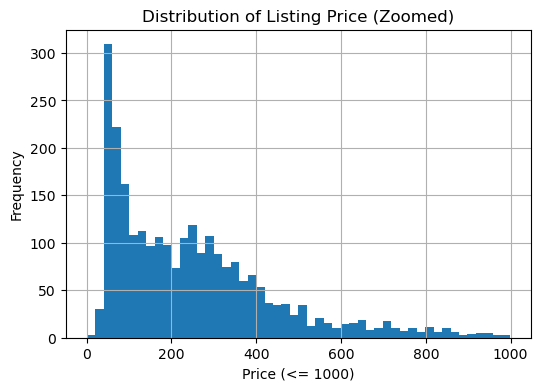

In [21]:
# 把 price 转成数值（用于分析）
price_num = (
    df["price"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
)

price_num = pd.to_numeric(price_num, errors="coerce")

# 画分布图（<=1000）
plt.figure(figsize=(6, 4))
price_num[price_num <= 1000].dropna().hist(bins=50)
plt.xlabel("Price (<= 1000)")
plt.ylabel("Frequency")
plt.title("Distribution of Listing Price (Zoomed)")
plt.show()


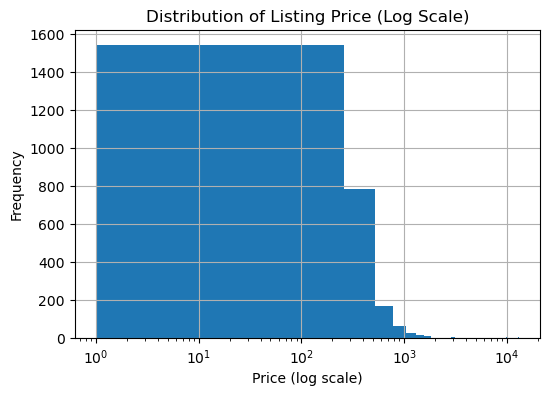

In [22]:
plt.figure(figsize=(6, 4))
price_num.dropna().hist(bins=50)
plt.xscale("log")
plt.xlabel("Price (log scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Listing Price (Log Scale)")
plt.show()


The price distribution exhibits strong right skewness and clear long-tail
behavior. While the raw-scale histogram is dominated by extreme values,
a log-scale visualization reveals that prices span multiple orders of magnitude,
with a dense concentration in the lower price range and a gradually thinning
right tail.

The continuity of the tail on the log scale suggests that high-priced listings
are not isolated noise points but represent a systematic long-tailed structure
in the market. Therefore, these extreme values are retained for analysis, and
their impact is addressed through robust preprocessing choices rather than
outright removal.


##### Outlier Handling Decision

The observed long-tailed distribution indicates that extreme price values are a
systematic characteristic of the market rather than data errors or random noise.
As such, removing high-priced listings would distort the underlying data
distribution and introduce bias.

Instead of outlier removal, the impact of extreme values is addressed through
robust preprocessing strategies. In subsequent steps, price-related features
are transformed or scaled using methods that are less sensitive to extreme
values, allowing the full distribution to be retained while reducing undue
influence on model estimation.


#### d. Correlation Analysis (Numerical Features Only)

This section examines the correlation structure among numerical features to
identify potential multicollinearity. The analysis serves as a reference for
subsequent feature engineering and modeling decisions; no features are removed
at this stage.


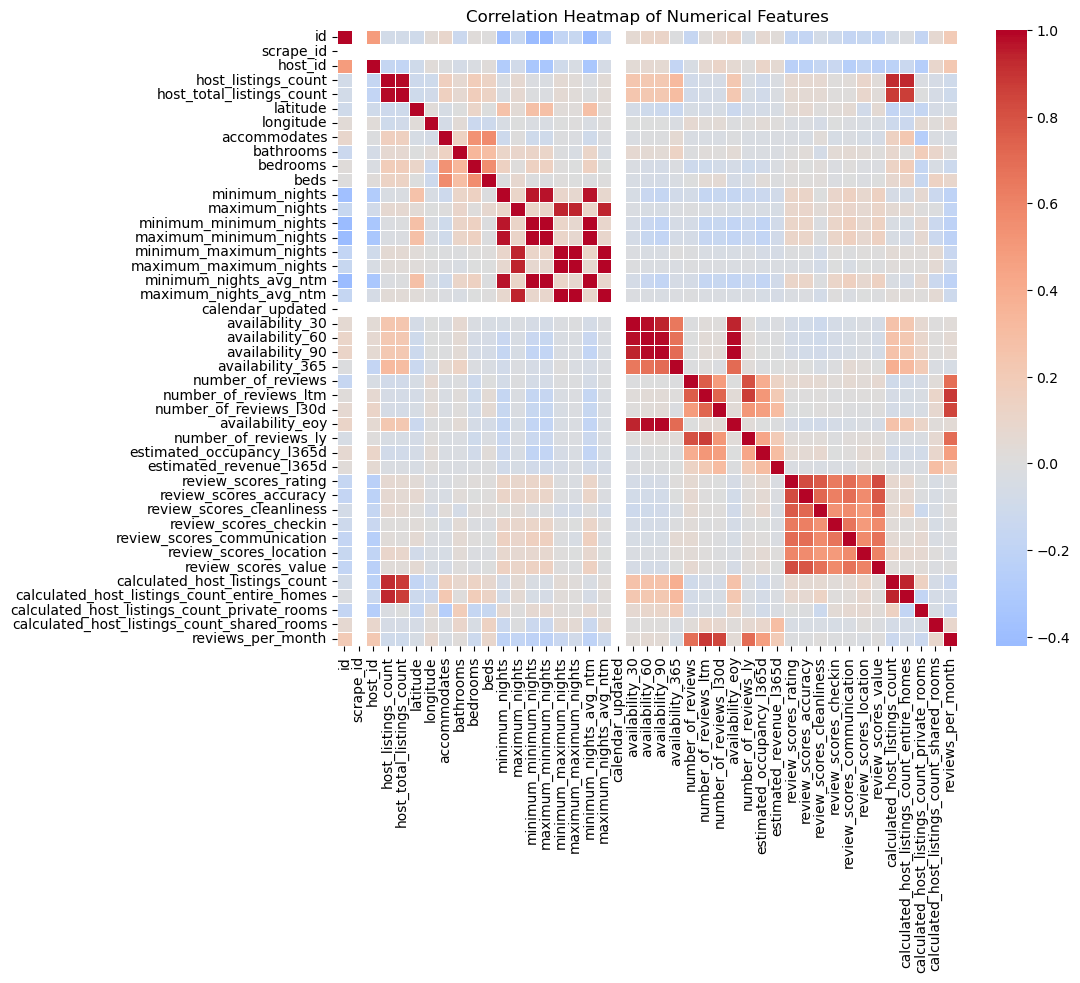

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features only
num_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    num_df.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


The correlation heatmap reveals several clearly defined clusters among numerical features. 
Strong correlations are observed among minimum/maximum night constraints, availability variables 
across different time horizons, and review score components, indicating potential multicollinearity 
within these groups.

These patterns reflect structural relationships inherent in the dataset rather than data quality issues.
At this stage, no features are removed based solely on correlation; instead, the observed structure 
serves as a reference for subsequent feature engineering and modeling decisions.


### Summary of Preprocessing Decisions

Based on the data profiling results, the following preprocessing decisions are made to guide subsequent data cleaning and feature engineering steps.

**Missing Values**
- Features with 100% missing values are removed, as they contain no usable information.
- Features exhibiting systematic missingness (e.g., review-related variables) are retained, as the missingness reflects meaningful absence of activity rather than data errors.
- Moderate missing features are imputed using methods appropriate to their data types.
- Low missing features are handled with simple imputation strategies.

**Distribution and Outliers**
- Price-related features exhibit strong right skewness and long-tailed distributions.
- Extreme values are treated as structural characteristics of the market rather than noise.
- Instead of outlier removal, robust transformations (e.g., log scaling) are applied to reduce skewness while preserving information.

**Correlation Structure**
- Correlation analysis reveals localized clusters of highly correlated numerical features.
- No features are removed solely based on correlation at this stage.
- Correlation insights are used to inform downstream modeling choices and regularization rather than aggressive feature elimination.

**Encoding and Scaling**
- Categorical variables are retained in their original form during profiling.
- Encoding decisions (e.g., one-hot encoding) are deferred to the feature engineering stage.
- Numerical features with skewed distributions are flagged for scaling or transformation during preprocessing.

**Categorical Encoding**
- At the data profiling stage, categorical variables are examined only in terms of completeness and semantic meaning.
- Encoding decisions (e.g., one-hot encoding) are intentionally deferred to the feature engineering stage.
- This separation ensures that encoding choices are made in alignment with model requirements and dimensionality considerations.
